In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
df=pd.read_csv("C:\\Users\\hp\\Documents\\IAFSM_ML\\K_means_PCA\\Dataset\\Iris Dataset.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
X=df.drop(["Species","Id"],axis=1)
Y=df["Species"]

In [54]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [55]:
Y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

array([[<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalLengthCm'>],
       [<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalWidthCm'>],
       [<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='PetalLengthCm'>],
       [<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalWidthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalWidthCm'>,
        <AxesSubplot:xlabel='P

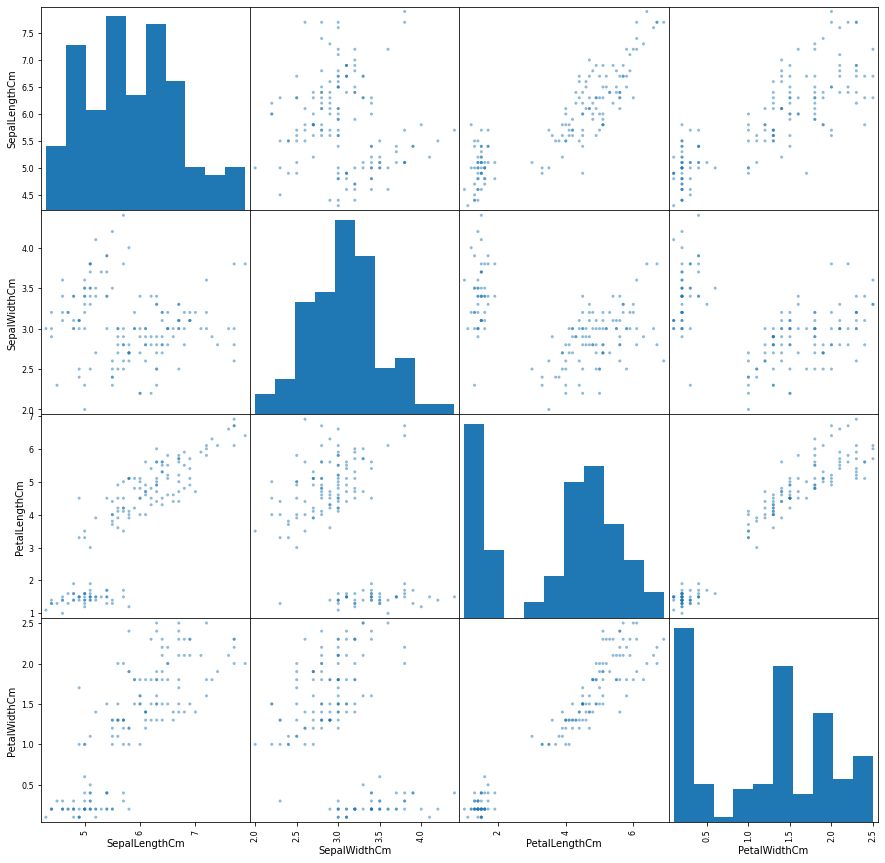

In [80]:
pd.plotting.scatter_matrix(X,figsize=(15,15))

Initializes and returns k random centroids

In [61]:
def initialize_random_centroids(K, X):
    m, n = np.shape(X)
    # a centroid should be of shape (1, n), so the centroids array will be of shape (K, n)
    centroids = np.zeros((K, n))
    for i in range(K):
        # pick a random data point from X as the centroid
        r_point=np.random.choice(range(m))
        centroids[i] =  X[r_point] 
    return centroids

 Calculates and returns the euclidean distance between two vectors x1 and x2

In [62]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum(np.power(x1 - x2, 2)))

Finds and returns the index of the closest centroid for a given vector x

In [72]:
def closest_centroid(x, centroids, K):
    distances = np.zeros(K)
    for i in range(K):
        distances[i] = euclidean_distance(centroids[i], x)
    return np.argmin(distances) # return the index of the lowest distance

Finds and returns the index of the closest centroid for a given vector x

In [73]:
def closest_centroid(x, centroids, K):
    distances = np.zeros(K)
    for i in range(K):
        distances[i] = euclidean_distance(centroids[i], x)
    return np.argmin(distances) # return the index of the lowest distance

Returns an array of cluster indices for all the data samples

In [65]:
def create_clusters(centroids, K, X): 
    m,n = np.shape(X)
    cluster_id = np.empty(m)
    for i in range(m):
        cluster_id[i] = closest_centroid(X[i], centroids, K)
    return cluster_id

Computes and returns the new centroids of the clusters

In [66]:
def compute_means(cluster_id, K, X):
    m, n = np.shape(X)
    centroids = np.zeros((K, n))
    for i in range(K):
        points = X[cluster_id == i] # gather points for the cluster i
        centroids[i] = np.mean(points, axis=0) # use axis=0 to compute means across points
    return centroids

In [67]:
def Kmeans(X):
    K=3
    max_iterations=200
    centroids = initialize_random_centroids(K, X)
    # loop till max_iterations or convergence
    print(f"initial centroids: {centroids}")
    for i in range(max_iterations):
        clusters = create_clusters(centroids, K, X)# create clusters by assigning the samples to the closet centroids
        previous_centroids = centroids                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
        centroids = compute_means(clusters, K, X) # compute means of the clusters and assign to centroids
        diff = previous_centroids - centroids# if the new_centroids are the same as the old centroids, return clusters
        if not diff.any():
            return centroids,clusters
    return centroids,clusters

In [68]:
X_scaled=X-X.mean()/X.std()

In [70]:
x_scl=np.asarray(X_scaled)

In [74]:
centroids,clusters=Kmeans(x_scl)

initial centroids: [[-0.65660229 -3.94345034  3.36974429  0.22933919]
 [-2.15660229 -4.54345034  2.36974429  0.12933919]
 [-0.65660229 -3.84345034  3.16974429  0.72933919]]


In [75]:
X_reduced,_,_=PCA(X,n_components=2)

In [76]:
X_reduced

array([[-2.68420713, -0.32660731],
       [-2.71539062,  0.16955685],
       [-2.88981954,  0.13734561],
       [-2.7464372 ,  0.31112432],
       [-2.72859298, -0.33392456],
       [-2.27989736, -0.74778271],
       [-2.82089068,  0.08210451],
       [-2.62648199, -0.17040535],
       [-2.88795857,  0.57079803],
       [-2.67384469,  0.1066917 ],
       [-2.50652679, -0.65193501],
       [-2.61314272, -0.02152063],
       [-2.78743398,  0.22774019],
       [-3.22520045,  0.50327991],
       [-2.64354322, -1.1861949 ],
       [-2.38386932, -1.34475434],
       [-2.6225262 , -0.81808967],
       [-2.64832273, -0.31913667],
       [-2.19907796, -0.87924409],
       [-2.58734619, -0.52047364],
       [-2.3105317 , -0.39786782],
       [-2.54323491, -0.44003175],
       [-3.21585769, -0.14161557],
       [-2.30312854, -0.10552268],
       [-2.35617109,  0.03120959],
       [-2.50791723,  0.13905634],
       [-2.469056  , -0.13788731],
       [-2.56239095, -0.37468456],
       [-2.63982127,

## Cluster result from K means 

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

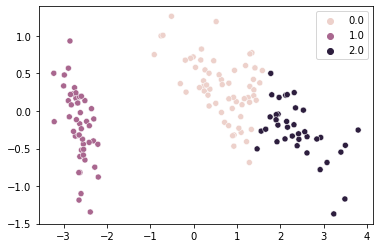

In [77]:
import seaborn as sns
sns.scatterplot(X_reduced[:,0],X_reduced[:,1],hue=clusters)

## Original clusters

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

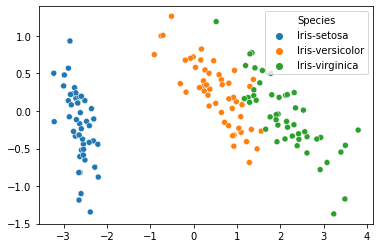

In [78]:
sns.scatterplot(X_reduced[:,0],X_reduced[:,1],hue=Y)

### Function to implement PCA

In [46]:
def PCA(X,n_components=2):
    X=X-np.mean(X,axis=0)#Normalizing  the data
    covariance_mat=np.cov(X,rowvar=False)## calculate the covariance matrix
    eig_values, eig_vectors = np.linalg.eig(covariance_mat)# calculate eigen values and eigen vectors
    indices = np.argsort(eig_values)[::-1]
    eigenvectors_sorted = eig_vectors[:,indices]# sort eigen vectors based on highest eigen values 
    eigenvector_subset = eigenvectors_sorted[:,:n_components]
    X_reduced = np.dot(eigenvector_subset.transpose(),X.transpose()).transpose()
    return X_reduced,eigenvectors_sorted,eig_values

In [29]:
X_red,e_vectors,e_values=PCA(X,n_components=3)

In [45]:
e_values[0:3]

array([4.22484077, 0.24224357, 0.07852391])

### Plotting the data in first three eigen vectors in 3-D scatter plot

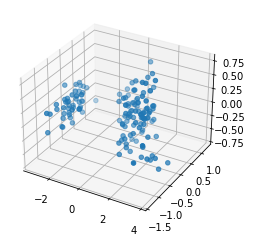

In [43]:
ax = plt.axes(projection='3d')
ax.scatter3D(X_red[:,0], X_red[:,1], X_red[:,2], cmap='Greens');